In [1]:
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, CSVLogger
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers
import tensorflow as tf
import matplotlib.pyplot as plt
from time import time
from imutils import paths
import cv2
import os
import numpy as np

conda install pillow

In [2]:
img = image.load_img(r"C:\Users\abhis\OneDrive\Pictures\Desktop\Project\MY dataset\Train Set\EIFFEL TOWER\23.jpg")

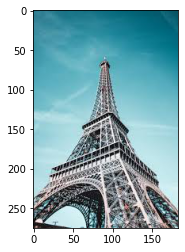

In [3]:
plt.imshow(img)

In [4]:
cv2.imread(r"C:\Users\abhis\OneDrive\Pictures\Desktop\Project\MY dataset\Train Set\EIFFEL TOWER\23.jpg").shape

(275, 183, 3)

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
trainGen = train_datagen.flow_from_directory(
        r"C:\Users\abhis\OneDrive\Pictures\Desktop\Project\MY dataset\Train Set",
        target_size=(64, 64),
        batch_size=32,
        color_mode="rgb",
        shuffle=True,
        class_mode='categorical')

valGen = test_datagen.flow_from_directory(
        r"C:\Users\abhis\OneDrive\Pictures\Desktop\Project\MY dataset\Validation_Set",
        target_size=(64, 64),
        batch_size=32,
        color_mode="rgb",
        shuffle=False,
        class_mode='categorical')

testGen = test_datagen.flow_from_directory(
        r"C:\Users\abhis\OneDrive\Pictures\Desktop\Project\MY dataset\Test_Set",
        target_size=(64, 64),
        batch_size=32,
        color_mode="rgb",
        shuffle=False,
        class_mode='categorical')
totalTrain = len(list(paths.list_images(r"C:\Users\abhis\OneDrive\Pictures\Desktop\Project\MY dataset\Train Set")))
totalVal = len(list(paths.list_images(r"C:\Users\abhis\OneDrive\Pictures\Desktop\Project\MY dataset\Validation_Set")))
totalTest = len(list(paths.list_images(r"C:\Users\abhis\OneDrive\Pictures\Desktop\Project\MY dataset\Test_Set")))

Found 6370 images belonging to 30 classes.
Found 600 images belonging to 30 classes.
Found 484 images belonging to 30 classes.


In [7]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(512, activation='relu'))
cnn.add(tf.keras.layers.Dense(126, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(30, activation='softmax'))

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0

# finally compile and train the cnn

In [9]:

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


print('Fit the model...')
t0 = time() #timing counter starts
print('The model has started learning...')
nepochs=120
batch_size=32
H = cnn.fit(
        x=trainGen,
        steps_per_epoch=totalTrain // batch_size,
        validation_data=valGen,
        validation_steps=totalVal // batch_size,
        epochs=nepochs)
print('Fit model took', int(time() - t0),'s')

Fit the model...
The model has started learning...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 199 steps, validate for 18 steps
Epoch 1/120
199/199 [==============================] - 125s 628ms/step - loss: 3.2911 - accuracy: 0.0858 - val_loss: 4.9333 - val_accuracy: 0.0347
Epoch 2/120
199/199 [==============================] - 110s 555ms/step - loss: 3.0414 - accuracy: 0.1377 - val_loss: 5.5371 - val_accuracy: 0.0556
Epoch 3/120
199/199 [==============================] - 108s 542ms/step - loss: 2.8938 - accuracy: 0.1777 - val_loss: 3.4066 - val_accuracy: 0.1997
Epoch 4/120
199/199 [==============================] - 113s 568ms/step - loss: 2.7808 - accuracy: 0.2162 - val_loss: 3.0650 - val_accuracy: 0.2049
Epoch 5/120
199/199 [==============================] - 130s 655ms/step - loss: 2.6455 - accuracy: 0.2504 - val_loss: 2.5624 - val_accuracy: 0.3524
Epoch 6/120
199/199 [==============================] - 124s 623ms/step - loss: 2.5578 - accuracy: 0.2797 - val_loss: 2.99

Epoch 55/120
199/199 [==============================] - 105s 527ms/step - loss: 1.7449 - accuracy: 0.5147 - val_loss: 1.3744 - val_accuracy: 0.6354
Epoch 56/120
199/199 [==============================] - 103s 518ms/step - loss: 1.7579 - accuracy: 0.5159 - val_loss: 1.2472 - val_accuracy: 0.6493
Epoch 57/120
199/199 [==============================] - 104s 521ms/step - loss: 1.7506 - accuracy: 0.5151 - val_loss: 1.0189 - val_accuracy: 0.6979
Epoch 58/120
199/199 [==============================] - 101s 510ms/step - loss: 1.7069 - accuracy: 0.5268 - val_loss: 1.2352 - val_accuracy: 0.6771
Epoch 59/120
199/199 [==============================] - 103s 516ms/step - loss: 1.7126 - accuracy: 0.5257 - val_loss: 0.9086 - val_accuracy: 0.7587
Epoch 60/120
199/199 [==============================] - 105s 530ms/step - loss: 1.6864 - accuracy: 0.5341 - val_loss: 0.9228 - val_accuracy: 0.7413
Epoch 61/120
199/199 [==============================] - 107s 536ms/step - loss: 1.6451 - accuracy: 0.5390 - val_

199/199 [==============================] - 108s 544ms/step - loss: 1.3172 - accuracy: 0.6355 - val_loss: 0.8289 - val_accuracy: 0.7812
Epoch 111/120
199/199 [==============================] - 105s 528ms/step - loss: 1.3302 - accuracy: 0.6365 - val_loss: 0.8750 - val_accuracy: 0.7622
Epoch 112/120
199/199 [==============================] - 107s 536ms/step - loss: 1.3168 - accuracy: 0.6376 - val_loss: 0.9880 - val_accuracy: 0.7326
Epoch 113/120
199/199 [==============================] - 107s 538ms/step - loss: 1.3273 - accuracy: 0.6333 - val_loss: 0.6751 - val_accuracy: 0.8073
Epoch 114/120
199/199 [==============================] - 105s 529ms/step - loss: 1.3247 - accuracy: 0.6330 - val_loss: 1.1030 - val_accuracy: 0.6944
Epoch 115/120
199/199 [==============================] - 106s 533ms/step - loss: 1.3362 - accuracy: 0.6310 - val_loss: 0.9129 - val_accuracy: 0.7361
Epoch 116/120
199/199 [==============================] - 105s 527ms/step - loss: 1.3228 - accuracy: 0.6377 - val_loss: 0

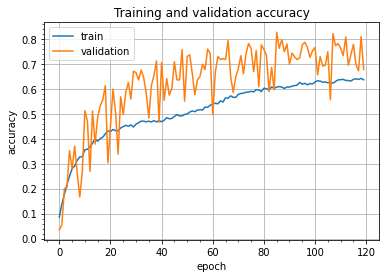

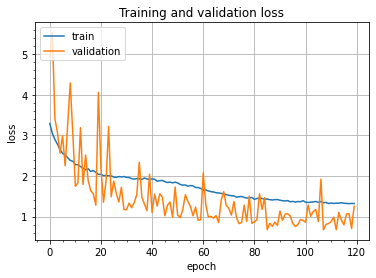

In [10]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.minorticks_on()
plt.grid(True)
plt.legend(['train', 'validation'], loc='upper left')
# save image to disk
plt.savefig('Model Accuracy', dpi=250)
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.minorticks_on()
plt.grid(True)
plt.legend(['train', 'validation'], loc='upper left')
# save image to disk
plt.savefig('Final Model Loss', dpi=250)
plt.show()

# Test Accuracy

In [11]:
scores = cnn.evaluate(testGen)
print('Test loss:',scores[0])
print('Test accuracy:',"{:.2%}".format(scores[1]))

  ...
    to  
  ['...']
16/16 [==============================] - 2s 97ms/step - loss: 2.0250 - accuracy: 0.4897
Test loss: 2.0249800607562065
Test accuracy: 48.97%
